## The fishery problem

We name the annual catch $y$ (in monetary value). It depends on the stock of fish $s$ and the number of fishing boats $b$. The dependency between the different variables is given by the following equation:

- $y = f(s,b)$. The catch depends on the stock and the number of boats.
- $\frac{\partial y}{\partial s} > 0$, the catch increases with the stock.
- $\frac{\partial y}{\partial b} > 0$, the catch increases with the number of boats.
- $\frac{\partial^2 y}{\partial b^2} < 0$, each additional boat catch less.

We can finally write the cost of fishing as $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def y_t(s_t, b_t, y_0: float = 0.01):
    """
    Annual catch as a function of stock and number of boats. 
    Let us take the value from the book for the moment.
    """
    return y_0* s_t * np.sqrt(b_t)

def c_t(b_t, c_0:float=0.125):
    """
    Cost of fishing as a function of the number of boats.
    Let us take the value from the book for the moment.
    """
    return c_0 * b_t

def g_t(s_t:float, g_0 : float = 0.01, g_1: float = 0.01):
    """
    Regeneration of the stock as a function of the stock.
    Let us take the value from the book for the moment.
    It is modelled to evolve with

    g_t = g_0 * (s_t - g_1 * s_t**2)

    Args:
        s_t: stock at time t
        g_0: linear prefactor
        g_1: quadratic prefactor
    """
    return g_0 * (s_t - g_1 * s_t**2)

def b_c(y_0:float, s_t:float, c_t:float, n_players:int):
    """
    What is the number of boats that gives us maximum catch with no losses ?
    If we were really smart, we could calculate it from the condition y_t = c_t
    We make the assumption that the player knows how many other players are there
    and that he assumes them to fish as much as him. This is a simplification.


    Args:
        y_0: initial catch per boat
        s_t: stock at time t
        c_t: cost of fishing per boat
        n_players: number of players
    """

    return  (y_0 * s_t/c_t)**2/n_players

def b_s(g_0:float, y_0:float, g_1:float, s_t:float, n_players:int):
    """
    Sustainable number of boats for each individual player, which 
    stems from the condition that g_t = y_t. We assume that all players fish the same amount.
    
    Args:
        g_0: linear prefactor for regeneration
        y_0: initial catch per boat
        g_1: quadratic prefactor for regeneration
        s_t: stock at time t
        n_players: number of players
    """
    return (g_0 / y_0 * (1 - g_1 * s_t)) ** 2/n_players

In [5]:
# ressource stock
st = 100
nplayers = 2
n_rounds = 8
# some model parameters

# parameters of the growth rate
g0 = 0.03; g1 = 0.001

# parameters for the catches
y0 = 0.01

# parameter for the cost
c0 = 0.125
# initial stock
s_init = 100

# Steady states

We would like to see what happens in a stable situation. There we have actually $g_t(s_t) = y_t(s_t, b_t)$. This depends really on the specific model. In the case of the book we can write:


$g_0 (s_t - g_1  s_t^2) = y_0  s_t  \sqrt{b_t}$

$g_0 (1 - g_1  s_t) = y_0  \sqrt{b_t}$

Solving for total number of boats that is sustainable: 

$b_{sust} = \left(\frac{g_0}{y_0} (1 - g_1  s_{init})\right)^2$

In [6]:
b_sust = b_s(g0, y0, g1, s_init, nplayers)

low_fishing:int = np.floor(b_sust)
print(low_fishing)

3.0


## The competetive argument

Let us now also look at the competetive argument. This says that the fishers should go for the situation where $y_t = c_t$. Let us solve for this:

$y_0 s_t \sqrt{b_t} = c_0  {b_t}$

And we get the number of boats for the person that looks at the situation in the competetive sense


$b_c = \left(\frac{y_0 s_t}{c_0}\right)^2 $



In [7]:
bc = b_c(y0, s_init, c0,nplayers)
print(bc)

intensive_fishing = np.floor(bc)
print(intensive_fishing)

32.0
32.0


In [8]:
# boats_t = np.array([[intensive_fishing, intensive_fishing], [low_fishing,intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing]])

# sustainable fishing
# boats_t = low_fishing*np.ones((n_rounds, 2))

# intensive fishing
# boats_t = intensive_fishing * np.ones((n_rounds, 2))

# random fishing
boats_t = np.random.choice([low_fishing, intensive_fishing], size=(n_rounds, 2))

st = s_init
total_boats_t = np.sum(boats_t, axis=1)
print(f'Total boats: {total_boats_t}')
# normalize efforts
catch_players = np.zeros((nplayers, len(total_boats_t)))
stock_evolution = np.zeros(len(total_boats_t))
for i, b_t in enumerate(total_boats_t):
    # now safe the time evolution of the stock
    stock_evolution[i] = st
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    print(f'Round {i+1}: Total catch = {yt}')
    for j in range(nplayers):
        share = boats_t[i, j] / total_boats_t[i]
        catch_players[j, i] = share*yt
        print(f'Player {j+1} catch = {catch_players[j, i]}')
    # update stock
    st = st - yt+ gt
    print(f'New stock = {st}')

# cumulative catch after each round
print(f'Catch players: {catch_players}')
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f'Cumulative catch: {cumulative_catch}')

Total boats: [35. 35. 35. 35. 64. 35. 35. 35.]
Round 1: Total catch = 5.916079783099616
Player 1 catch = 0.50709255283711
Player 2 catch = 5.408987230262506
New stock = 96.78392021690038
Round 2: Total catch = 5.725813937243306
Player 1 catch = 0.4907840517637119
Player 2 catch = 5.235029885479594
New stock = 93.68061006978755
Round 3: Total catch = 5.542219633023085
Player 1 catch = 0.4750473971162644
Player 2 catch = 5.0671722359068205
New stock = 90.68552703776666
Round 4: Total catch = 5.36502813127865
Player 1 catch = 0.45985955410959856
Player 2 catch = 4.905168577169051
New stock = 87.79434877319748
Round 5: Total catch = 7.023547901855799
Player 1 catch = 3.5117739509278993
Player 2 catch = 3.5117739509278993
New stock = 83.17339590424233
Round 6: Total catch = 4.920604460008285
Player 1 catch = 4.498838363436146
Player 2 catch = 0.4217660965721387
New stock = 80.54045890777401
Round 7: Total catch = 4.7648378066584725
Player 1 catch = 0.4084146691421548
Player 2 catch = 4.3564

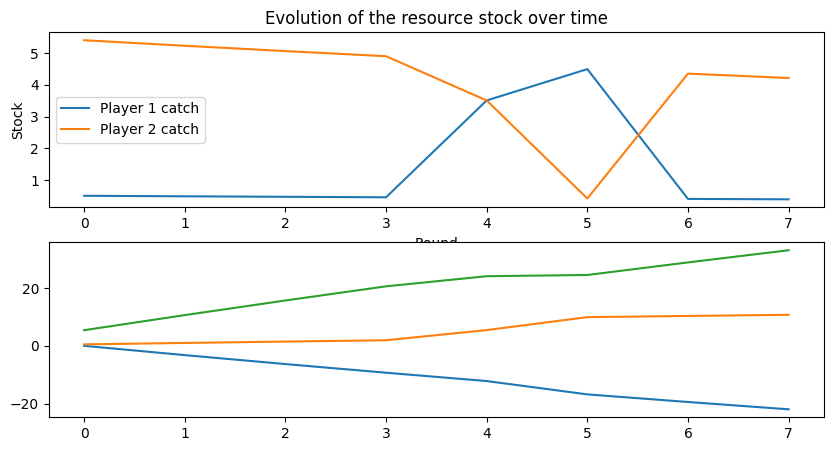

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.plot(catch_players[0, :], label='Player 1 catch')
ax1.plot(catch_players[1, :], label='Player 2 catch')
ax1.legend()
ax1.set_xlabel('Round')
ax1.set_ylabel('Stock')
ax1.set_title('Evolution of the resource stock over time')

ax2.plot(stock_evolution-stock_evolution[0], label='Stock evolution')
ax2.plot(cumulative_catch[0, :], label='Player 1 catch')
ax2.plot(cumulative_catch[1, :], label='Player 2 catch')


## Making the cost analysis

John Leach actually extended the analysis above to the a cost analysis. This made possible be the decreasing returns of the catch. The cost of fishing is given by $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

Text(0.5, 1.0, 'Total catch and cost as a function of effort')

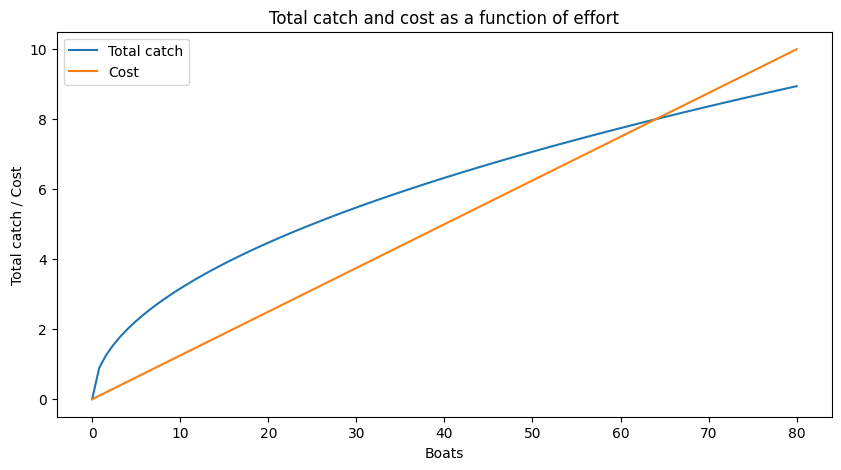

In [10]:
st = 100
b_t = np.linspace(0,80, 100)

yt = y_t(st, b_t, y0)
ct = c_t(b_t, c0)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, yt, label='Total catch')
ax.plot(b_t, ct, label='Cost')
ax.legend()
ax.set_xlabel('Boats')
ax.set_ylabel('Total catch / Cost')
ax.set_title('Total catch and cost as a function of effort')

so we can nicely see that the fishing is profiable as long as the revenue is larger than the cost. 

## Maximizing the profits for society

We have seen that each individual has an incentive to fish as much as possible until the profits go to zero. What about society ?

Society would like to maximize the total profits for the society. How can society do this ? Well simply maximize the total profits.

In [11]:
# get the value of where, where the profits crosses zero
profits = yt - ct

for i, p in enumerate(profits):
    if p < 0:
        print(f'Profits go to zero at effort {b_t[i]}')
        break

pIndividual = b_t[i]
# find the value of e where profits are maximized
max_profit_index = np.argmax(profits)
print(f'Maximum profits at effort {b_t[max_profit_index]} with profits {profits[max_profit_index]}')

Profits go to zero at effort 64.64646464646465
Maximum profits at effort 16.161616161616163 with profits 1.999949240834828


Text(0, 0.5, 'Profits')

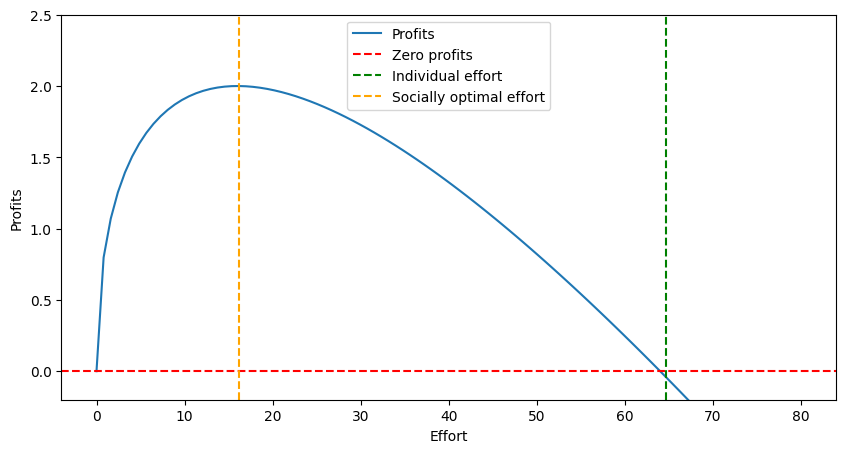

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, profits, label='Profits')
ax.axhline(0, color='red', linestyle='--', label='Zero profits')
ax.set_ylim(-0.2, 2.5)
ax.axvline(pIndividual, color='green', linestyle='--', label='Individual effort')
ax.axvline(b_t[max_profit_index], color='orange', linestyle='--', label='Socially optimal effort')
ax.legend()
ax.set_xlabel('Effort')
ax.set_ylabel('Profits')

What a nice visualization of overfishing. 

In [13]:
# parameters of the growth rate
g0 = 0.03; g1 = 0.001

# parameters for the catches
y0 = 0.01

# initial stock
s_init = 100

b_sust = (g0/y0*(1-g1*s_init))**2
print(b_sust)

7.290000000000001


# On the problems with the state solution

In the state we can limit the number of boats and thus the catch. But this might lead to a lack of innovation. We now would like to visualize the problem with the state solution. The state solution is to limit the number of boats to $b_{sust}$. Let us visualize this through the efficiency of different boats. In the blog posts we have different islands. Therefore it would seem perfectly reasonsable to assume that each boat has a different efficiency. Let us assume that the boats are ordered by their efficiency. The most efficient boat is boat 1, the second most efficient boat is boat 2 and so on. Now we can visualize the total cost of fishing as a function of the number of boats. 


We will assume that there are four islands with different costs of fishing. The first island has the most efficient boats, the second island has the second most efficient boats and so on. We can visualize this as follows:

(-0.2, 10.0)

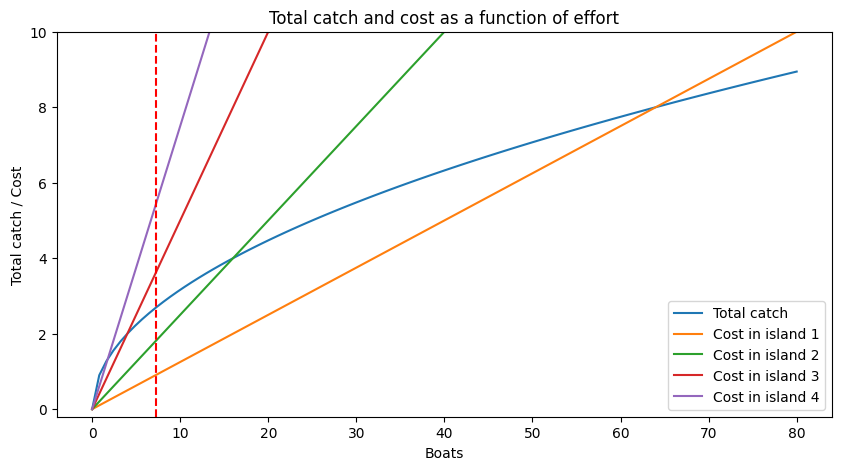

In [14]:
# cost for the different islands

c_islands = [0.125, 0.25, 0.5, 0.75]
st = 100
b_t = np.linspace(0, 80, 100)

yt = y_t(st, b_t, y0)
ct = c_t(b_t, c0)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, yt, label="Total catch")
for ii, c in enumerate(c_islands):
    ct = c_t(b_t, c)
    ax.plot(b_t, ct, label="Cost in island {}".format(ii+1))
ax.legend()
ax.set_xlabel("Boats")
ax.set_ylabel("Total catch / Cost")
ax.axvline(b_sust, color='red', linestyle='--', label='Sustainable effort')
ax.set_title("Total catch and cost as a function of effort")
ax.set_ylim(-0.2, 10)

# Now compare

We now have two possibilities. In the unregulated case each one of the fishers goes to the maxmimum of what he thinks he can create. 

In [15]:
# number of rounds to play
nrounds = 3
nplayers = 4

st = s_init
# normalize efforts
catch_players = np.zeros((nplayers, nrounds))

boats_t = np.zeros((nplayers, nrounds))
costs_t = np.zeros((nplayers, nrounds))
total_boats_t = np.zeros(nrounds)
stock_evolution = np.zeros(nrounds)
total_catch_t = np.zeros(nrounds)
for ii in range(nrounds):
    # now safe the time evolution of the stock
    stock_evolution[ii] = st

    # given the stock we can also calculate the total number of boats for each of the players
    # and then the total number of boats
    for jj in range(nplayers):
        boats_t[jj, ii] = b_s(g0, y0 ,g1, st, nplayers)
        costs_t[jj, ii] = c_t(boats_t[jj, ii], c_islands[jj])

    total_boats_t[ii] = np.sum(boats_t[:, ii])
    b_t = total_boats_t[ii]
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    total_catch_t[ii] = yt
    print(f'Round {ii+1}: Total catch = {yt}')
    for jj in range(nplayers):
        share = boats_t[jj,ii] / total_boats_t[ii]
        catch_players[jj, ii] = share*yt
        print(f'Player {jj+1} catch = {catch_players[jj, ii]}')        
        print(f"Player {jj+1} cost = {costs_t[jj, ii]}")

    # update stock
    st = st - yt+ gt
    print(f'New stock = {st}')

# cumulative catch after each round
print(f'Catch players: {catch_players}')
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f'Cumulative catch: {cumulative_catch}')

Round 1: Total catch = 2.7
Player 1 catch = 0.675
Player 1 cost = 0.22781250000000003
Player 2 catch = 0.675
Player 2 cost = 0.45562500000000006
Player 3 catch = 0.675
Player 3 cost = 0.9112500000000001
Player 4 catch = 0.675
Player 4 cost = 1.3668750000000003
New stock = 100.0
Round 2: Total catch = 2.7
Player 1 catch = 0.675
Player 1 cost = 0.22781250000000003
Player 2 catch = 0.675
Player 2 cost = 0.45562500000000006
Player 3 catch = 0.675
Player 3 cost = 0.9112500000000001
Player 4 catch = 0.675
Player 4 cost = 1.3668750000000003
New stock = 100.0
Round 3: Total catch = 2.7
Player 1 catch = 0.675
Player 1 cost = 0.22781250000000003
Player 2 catch = 0.675
Player 2 cost = 0.45562500000000006
Player 3 catch = 0.675
Player 3 cost = 0.9112500000000001
Player 4 catch = 0.675
Player 4 cost = 1.3668750000000003
New stock = 100.0
Catch players: [[0.675 0.675 0.675]
 [0.675 0.675 0.675]
 [0.675 0.675 0.675]
 [0.675 0.675 0.675]]
Cumulative catch: [[0.675 1.35  2.025]
 [0.675 1.35  2.025]
 [0

What is the price for the catch

In [16]:
total_c_t = np.sum(costs_t, axis = 1)
print(total_c_t)

total_catch_t = np.sum(catch_players, axis=1)
print(total_catch_t)
average_cost = total_c_t / total_catch_t
print(average_cost)

total_catch = np.sum(catch_players)
total_cost = np.sum(total_c_t)
print(f'Total cost: {total_cost}')
print(f'Total catch: {total_catch}')

av_price = total_cost / total_catch
print(f"Average price: {av_price}")

[0.6834375 1.366875  2.73375   4.100625 ]
[2.025 2.025 2.025 2.025]
[0.3375 0.675  1.35   2.025 ]
Total cost: 8.884687500000002
Total catch: 8.1
Average price: 1.0968750000000003


Text(0.5, 0, 'Round')

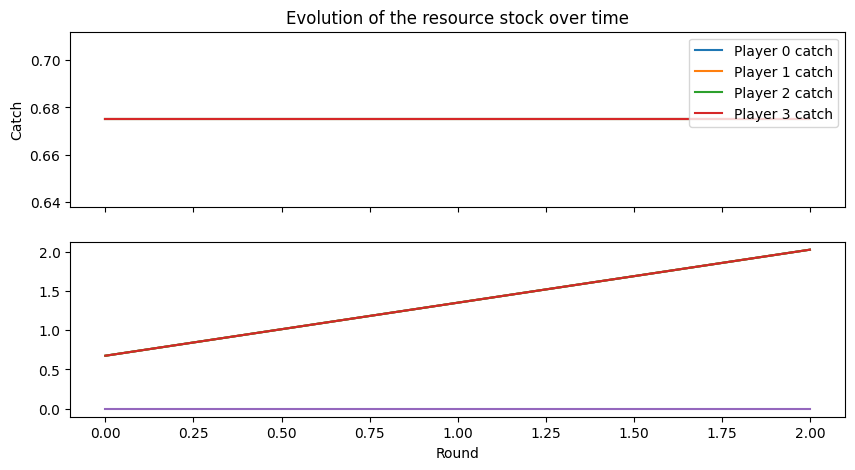

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

for jj in range(nplayers):
    ax1.plot(catch_players[jj, :], label=f"Player {jj} catch")
ax1.legend()
ax1.set_ylabel("Catch")
ax1.set_title("Evolution of the resource stock over time")

for jj in range(nplayers):
    ax2.plot(cumulative_catch[jj, :], label=f"Player {jj} catch")
ax2.plot(stock_evolution - stock_evolution[0], label="Stock evolution")
ax2.set_xlabel("Round")

So we can clearly see that the players are not able to coordinate their efforts and end up overfishing the resource. Let us now also visualize what happens when the state regulates the number of boats to $b_{sust}$.

In [18]:
# number of rounds to play
nrounds = 3
nplayers = 4

st = s_init
# normalize efforts
catch_players = np.zeros((nplayers, nrounds))

boats_t = np.zeros((nplayers, nrounds))
costs_t = np.zeros((nplayers, nrounds))
total_boats_t = np.zeros(nrounds)
stock_evolution = np.zeros(nrounds)
total_catch_t = np.zeros(nrounds)
for ii in range(nrounds):
    # now safe the time evolution of the stock
    stock_evolution[ii] = st

    # given the stock we can also calculate the total number of boats for each of the players
    # and then the total number of boats
    for jj in range(nplayers):
        boats_t[jj, ii] = b_c(y0, st, c_islands[jj], nplayers)
        costs_t[jj, ii] = c_t(boats_t[jj, ii], c_islands[jj])
    total_boats_t[ii] = np.sum(boats_t[:, ii])
    b_t = total_boats_t[ii]
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    total_catch_t[ii] = yt
    print(f"Round {ii+1}: Total catch = {yt}")
    for jj in range(nplayers):
        share = boats_t[jj, ii] / total_boats_t[ii]
        catch_players[jj, ii] = share * yt
        print(f"Player {jj+1} catch = {catch_players[jj, ii]}")
        print(f"Player {jj+1} cost = {costs_t[jj, ii]}")
    # update stock
    st = st - yt + gt
    print(f"New stock = {st}")

# cumulative catch after each round
print(f"Catch players: {catch_players}")
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f"Cumulative catch: {cumulative_catch}")

Round 1: Total catch = 4.630814663149935
Player 1 catch = 3.4551156035937343
Player 1 cost = 2.0
Player 2 catch = 0.8637789008984336
Player 2 cost = 1.0
Player 3 catch = 0.2159447252246084
Player 3 cost = 0.5
Player 4 catch = 0.09597543343315927
Player 4 cost = 0.3333333333333333
New stock = 98.06918533685007
Round 2: Total catch = 4.453716154738223
Player 1 catch = 3.3229799289238557
Player 1 cost = 1.9235130225266899
Player 2 catch = 0.8307449822309639
Player 2 cost = 0.9617565112633449
Player 3 catch = 0.20768624555774098
Player 3 cost = 0.48087825563167247
Player 4 catch = 0.09230499802566264
Player 4 cost = 0.3205855037544483
New stock = 96.26901778883835
Round 3: Total catch = 4.291711120236038
Player 1 catch = 3.202105706290101
Player 1 cost = 1.853544757205535
Player 2 catch = 0.8005264265725253
Player 2 cost = 0.9267723786027675
Player 3 catch = 0.20013160664313132
Player 3 cost = 0.46338618930138376
Player 4 catch = 0.08894738073028058
Player 4 cost = 0.30892412620092247
New 

In [19]:
total_c_t = np.sum(costs_t, axis=1)
print(total_c_t)
total_catch_t = np.sum(catch_players, axis=1)
print(total_catch_t)
average_cost = total_c_t / total_catch_t
print(average_cost)

total_catch = np.sum(catch_players)
total_cost = np.sum(total_c_t)

print(f"Total cost: {total_cost}")
print(f"Total catch: {total_catch}")
av_price = total_cost / total_catch
print(f"Average price: {av_price}")

[5.77705778 2.88852889 1.44426444 0.96284296]
[9.98020124 2.49505031 0.62376258 0.27722781]
[0.57885183 1.15770367 2.31540733 3.473111  ]
Total cost: 11.072694077820097
Total catch: 13.376241938124195
Average price: 0.8277881133609988


# Community solution

In [23]:
def leader_conservation_level(leader: int, sustainable_boats: float, st: float, s_init: float, test: bool = False) -> float:
    """
    Simulates the decision of a leader on the appropriate conservation
    level.

    Args:
        leader: Index of the leader 
        sustainable_boats: Sustainable number of boats based on the stock
        st: Current stock level
        s_init: Initial stock level
        test: If True, runs in test mode and always sets to moderate conservation level.

    Returns:
        adjusted_sustainable_boats: Adjusted sustainable number of boats
    """

    if test:
        print("Running in test mode, setting to moderate conservation level.")
        return sustainable_boats
    # Define conservation strategies
    conservation_strategies = {
        "aggressive": 1.1,  # 10% above sustainable (risky)
        "moderate": 1.0,  # Exactly sustainable (safe)
        "conservative": 0.9,  # 10% below sustainable (very safe)
    }

    # Simulate leader's decision based on stock level and their island efficiency
    if st < 0.8 * s_init:  # Low stock - be conservative
        if leader == 0:  # Efficient player might take more risk
            strategy = "moderate"
        else:
            strategy = "conservative"
    elif st > 0.95 * s_init:  # High stock - can be more aggressive
        strategy = "aggressive"
    else:
        strategy = "moderate"

    conservation_factor = conservation_strategies[strategy]
    adjusted_sustainable = sustainable_boats * conservation_factor

    print(f"  Leader chooses '{strategy}' strategy (factor: {conservation_factor})")
    print(f"  Adjusted sustainable boats: {adjusted_sustainable:.2f}")
    return adjusted_sustainable


def leader_distribution(
    leader: int, nplayers: int, cooperation_bonus: float, efficiency_bonus: float = 0.1, base_quota: float = 0.25, test:bool = False
) -> list[float]:
    """
    Simulates the leader's choice of distribution method for quotas.

    Args:
        leader: Index of the leader
        nplayers: Total number of players
        cooperation_bonus: Bonus for the leader's cooperation
        efficiency_bonus: Bonus for efficiency-based quotas
        base_quota: Base quota for each player
        test: If True, runs in test mode and always sets to equal distribution method.
    
    Returns:
        quota_weights: List of quota weights for each player
    """
    # Simulate leader's choice based on their own efficiency
    if leader <= 1:  # Efficient leaders prefer efficiency-based
        method = "efficiency"
    elif leader >= 2:  # Less efficient leaders prefer more equality
        method = "hybrid"
    else:
        method = "equal"

    if test:
        print("Running in test mode, setting to equal distribution method.")
        method = "equal"
    print(f"  Leader chooses '{method}' distribution method")

    # Calculate quotas based on leader's chosen method
    quota_weights: list[float] = []

    if method == "equal":
        for jj in range(nplayers):
            quota_weights.append(1/nplayers)

    elif method == "efficiency":
        # Pure efficiency-based quotas
        total_quota_weight = 0
        for jj in range(nplayers):
            efficiency_level = nplayers - jj - 1  # Island 0 is most efficient
            quota_weight = (
                base_quota + efficiency_level * efficiency_bonus * 1.5
            )  # More extreme
            quota_weights.append(quota_weight)
            total_quota_weight += quota_weight
        # Normalize
        quota_weights = [w / total_quota_weight for w in quota_weights]

    else:  # hybrid
        # Mix of efficiency and equality
        total_quota_weight = 0
        for jj in range(nplayers):
            efficiency_level = nplayers - jj - 1
            quota_weight = (
                base_quota + efficiency_level * efficiency_bonus * 0.7
            )  # Less extreme
            if jj == leader:
                quota_weight += cooperation_bonus
            quota_weights.append(quota_weight)
            total_quota_weight += quota_weight
        # Normalize
        quota_weights = [w / total_quota_weight for w in quota_weights]
    return quota_weights

def leader_enforcement(leader: int, st: float, s_init: float) -> float:
    """
    Simulates the leader's choice of enforcement level based on stock and position.

    Args:
        leader: Index of the leader
        st: Current stock level
        s_init: Initial stock level

    Returns:
        compliance_rate: Chosen enforcement level as a float
    """
    # Define enforcement levels
    enforcement_levels = {
        "strict": 0.95,  # 95% compliance
        "moderate": 0.85,  # 85% compliance
        "lenient": 0.75,  # 75% compliance
    }

    # Leader's enforcement choice depends on their position and stock
    if leader == 0 and st > 0.9 * s_init:  # Efficient leader with good stock
        enforcement = "lenient"
    elif st < 0.8 * s_init:  # Low stock requires strict enforcement
        enforcement = "strict"
    else:
        enforcement = "moderate"

    compliance_rate = enforcement_levels[enforcement]
    print(
        f"  Leader chooses '{enforcement}' enforcement (compliance: {compliance_rate*100:.0f}%)"
    )
    return compliance_rate

def leader_redistribution(leader: int) -> float:
    """
    Simulates the leader's choice of redistribution policy based on their position.

    Args:
        leader: Index of the leader
    Returns:
        current_redistribution_rate: Chosen redistribution rate as a float
    """
    # LEADER DECISION 3: Choose redistribution policy
    redistribution_policies = {
        "progressive": 0.20,  # Higher redistribution
        "moderate": 0.15,  # Standard redistribution
        "conservative": 0.10,  # Lower redistribution
    }

    # Leader's redistribution choice depends on their position
    if leader >= 2:  # Less efficient leaders prefer more redistribution
        redistribution_policy = "progressive"
    elif leader == 0:  # Most efficient leader prefers less
        redistribution_policy = "conservative"
    else:
        redistribution_policy = "moderate"

    current_redistribution_rate = redistribution_policies[redistribution_policy]
    print(
        f"  Leader chooses '{redistribution_policy}' redistribution policy ({current_redistribution_rate*100:.0f}%)"
    )
    return current_redistribution_rate

In [ ]:
## Community solution with real leadership decisions
# Rule 1: Graduated Quota System - quotas based on efficiency
# Rule 2: Rotating Leadership with actual choice options

# number of rounds to play
nrounds = 3
nplayers = 4

st = s_init
# normalize efforts
catch_players = np.zeros((nplayers, nrounds))

boats_t = np.zeros((nplayers, nrounds))
costs_t = np.zeros((nplayers, nrounds))
total_boats_t = np.zeros(nrounds)
stock_evolution = np.zeros(nrounds)
total_catch_t = np.zeros(nrounds)

test_mode = True  # Set to True to run in test mode
# Community governance parameters
base_quota = 0.2  # Base quota for least efficient
efficiency_bonus = 0.1  # Additional quota per efficiency level
cooperation_bonus = 0.05  # Bonus for community participation

print("=== Community Governance with Leader Decisions ===")
print("Rule 1: Graduated Quota System")
print("Rule 2: Rotating Leadership with real choices")
print()

for ii in range(nrounds):

    # first save the time evolution of the stock
    stock_evolution[ii] = st

    # Calculate sustainable fishing level for this stock
    tot_sustainable_boats = b_s(g0, y0, g1, st, nplayers)* nplayers

    # Rule 2: Rotating Leadership
    leader = ii % nplayers
    print(f"Round {ii+1}: Leader is Player {leader+1}")

    # LEADER DECISION 1: Choose conservation level
    adjusted_sustainable = leader_conservation_level(
        leader, tot_sustainable_boats, st, s_init, test=test_mode
    )
    print(f"  Sustainable boats: {tot_sustainable_boats:.2f}")
    print(f"  Adjusted sustainable boats: {adjusted_sustainable:.2f}")
    # LEADER DECISION 2: Choose quota distribution method
    quota_weights = leader_distribution(leader, nplayers, cooperation_bonus, efficiency_bonus, base_quota, test=test_mode)

    # LEADER DECISION 3: Choose redistribution policy
    current_redistribution_rate = leader_redistribution(leader)
    # Distribute boats according to leader's decisions
    for jj in range(nplayers):
        boats_t[jj, ii] = adjusted_sustainable * quota_weights[jj]
        costs_t[jj, ii] = c_t(boats_t[jj, ii], c_islands[jj])

    total_boats_t[ii] = np.sum(boats_t[:, ii])
    b_t = total_boats_t[ii]

    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    total_catch_t[ii] = yt
    print(f"  Total boats: {b_t:.2f}, Total catch: {yt:.2f}")

    # Calculate individual catches based on their boat contribution
    for jj in range(nplayers):
        share = boats_t[jj, ii] / total_boats_t[ii] if total_boats_t[ii] > 0 else 0
        catch_players[jj, ii] = share * yt

    # the boats that fished more than the average quota have to pay a
    # redistribution tax for everything that is above the average quota
    # this goes to the players that fished less than the average quota
    average_quota = np.mean(boats_t[:, ii])
    # now calculate the redistribution tax
    sustainable_catch_per_player = y_t(st, tot_sustainable_boats/nplayers, y0)/nplayers
    redistribution_tax = np.zeros(nplayers)
    for jj in range(nplayers):
        if catch_players[jj, ii] > sustainable_catch_per_player:
            # Calculate tax for excess catch
            excess_catch = catch_players[jj, ii] - sustainable_catch_per_player
            redistribution_tax[jj] = excess_catch * current_redistribution_rate
            catch_players[jj, ii] -= redistribution_tax[jj]
        else:
            redistribution_tax[jj] = 0.0
    ## let us first look how much less they fished
    underfished = np.zeros(nplayers)
    for jj in range(nplayers):
        if catch_players[jj, ii] < sustainable_catch_per_player:
            underfished[jj] = sustainable_catch_per_player - catch_players[jj, ii]

    # now redistribute the tax to the players that fished less than the average quota
    redistribution_amount = np.sum(redistribution_tax)
    for jj in range(nplayers):
        if underfished[jj] > 0:
            # Calculate redistribution share based on underfished amount
            share = underfished[jj] / np.sum(underfished)
            redistribution_share = redistribution_amount * share
            catch_players[jj, ii] += redistribution_share
    # verify that the total catch is correct
    yt2 = np.sum(catch_players[:, ii])

    # update stock
    st = st - yt+ gt
    print(f"  New stock: {st:.2f}")

=== Community Governance with Leader Decisions ===
Rule 1: Graduated Quota System
Rule 2: Rotating Leadership with real choices

Round 1: Leader is Player 1
Running in test mode, setting to moderate conservation level.
  Sustainable boats: 7.29
  Adjusted sustainable boats: 7.29
Running in test mode, setting to equal distribution method.
  Leader chooses 'equal' distribution method
  Leader chooses 'conservative' redistribution policy (10%)
  Total boats: 7.29, Total catch: 2.70
  New stock: 100.00
Round 2: Leader is Player 2
Running in test mode, setting to moderate conservation level.
  Sustainable boats: 7.29
  Adjusted sustainable boats: 7.29
Running in test mode, setting to equal distribution method.
  Leader chooses 'equal' distribution method
  Leader chooses 'moderate' redistribution policy (15%)
  Total boats: 7.29, Total catch: 2.70
  New stock: 100.00
Round 3: Leader is Player 3
Running in test mode, setting to moderate conservation level.
  Sustainable boats: 7.29
  Adjuste

=== Governance Comparison ===
Community Solution Benefits:
1. Sustainable fishing levels maintained
2. Efficiency-based quotas reward better technology
3. Rotating leadership ensures participation
4. Combines efficiency with equity



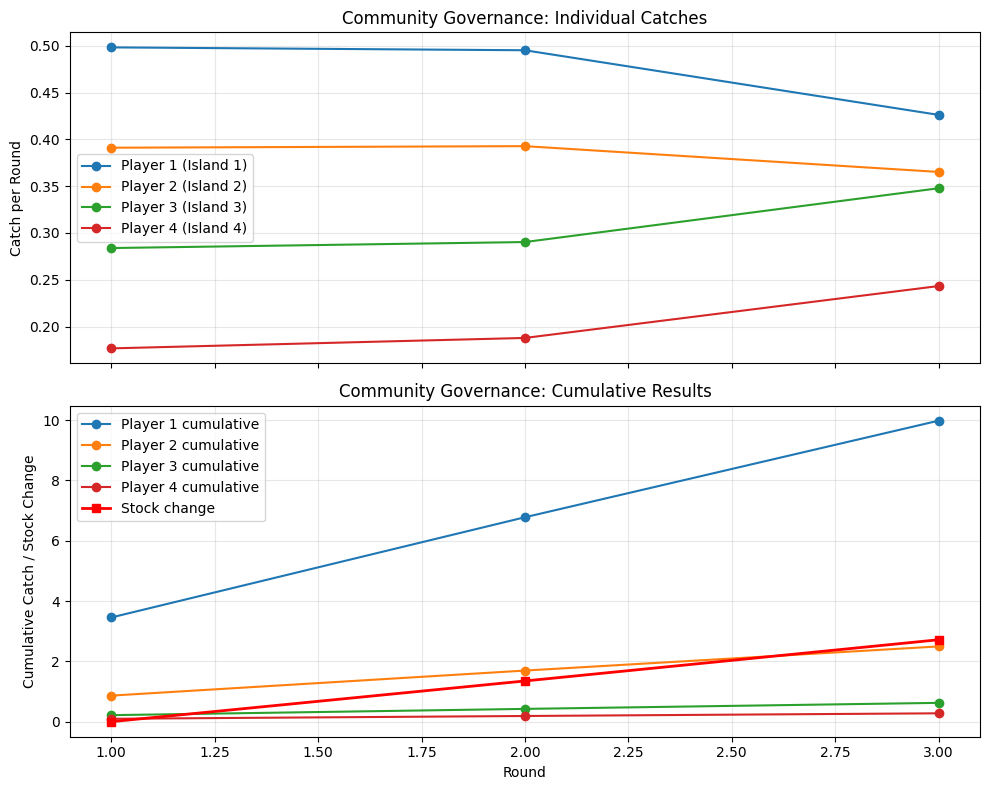

In [22]:
# Comparison of governance approaches
print("=== Governance Comparison ===")
print("Community Solution Benefits:")
print("1. Sustainable fishing levels maintained")
print("2. Efficiency-based quotas reward better technology")
print("3. Rotating leadership ensures participation")
print("4. Combines efficiency with equity")
print()

# Visualize the community solution
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot individual catches
for jj in range(nplayers):
    ax1.plot(range(1, nrounds+1), catch_players[jj, :], 'o-', label=f"Player {jj+1} (Island {jj+1})")
ax1.set_ylabel("Catch per Round")
ax1.set_title("Community Governance: Individual Catches")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot cumulative catches and stock evolution
for jj in range(nplayers):
    ax2.plot(range(1, nrounds+1), cumulative_catch[jj, :], 'o-', label=f"Player {jj+1} cumulative")
ax2.plot(range(1, nrounds+1), stock_evolution - stock_evolution[0], 's-', 
         label="Stock change", linewidth=2, color='red')
ax2.set_xlabel("Round")
ax2.set_ylabel("Cumulative Catch / Stock Change")
ax2.set_title("Community Governance: Cumulative Results")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()